In [1]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os

In [2]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files

['25-Mn-fw-EM-28.seq',
 '25-Mn-re-EM-27.seq',
 '55-Mn-fw-EM-28.seq',
 '55-Mn-re-EM-27.seq',
 'no-Mn-fw-EM-28.seq',
 'no-Mn-re-EM-27.seq']

In [3]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1',
 'no-Mn-fw-EM-28.ab1',
 'no-Mn-re-EM-27.ab1']

In [4]:
sequences = []
traces = []
for f in seq_files:
    sequences.append(SeqIO.read(f, 'fasta'))
    
sequences

[SeqRecord(seq=Seq('NNNNNNNNNACNANNNNTNGCTNGATTCTTTATGGATCTCACCTTGTTTCTACA...NNN', SingleLetterAlphabet()), id='25-Mn-fw-EM-28_E12.ab1', name='25-Mn-fw-EM-28_E12.ab1', description='25-Mn-fw-EM-28_E12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCTNNNNNNNTCCCTGTGTTTCACTGACCTCCTCAGGAGATAATAATACAT...NNN', SingleLetterAlphabet()), id='25-Mn-re-EM-27_F12.ab1', name='25-Mn-re-EM-27_F12.ab1', description='25-Mn-re-EM-27_F12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNCCTNNNGNAGANAATAATACATTCACNTTGGTCTCANGGTGATTTCTG...NNN', SingleLetterAlphabet()), id='55-Mn-fw-EM-28_G12.ab1', name='55-Mn-fw-EM-28_G12.ab1', description='55-Mn-fw-EM-28_G12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNGTCTNNNNGTTCCCTGTGTTTCACTGACCTCCTCAGGAGATAA...NNN', SingleLetterAlphabet()), id='55-Mn-re-EM-27_H12.ab1', name='55-Mn-re-EM-27_H12.ab1', description='55-Mn-re-EM-27_H12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='no-Mn-fw-EM-

In [5]:
for f in abi_files:
    traces.append(SeqIO.read(f, 'abi'))
    
traces

[SeqRecord(seq=Seq('NNNNNNNNNACNANNNNTNGCTNGATTCTTTATGGATCTCACCTTGTTTCTACA...NNN', IUPACUnambiguousDNA()), id='25-Mn-fw-EM-28', name='25-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCTNNNNNNNTCCCTGTGTTTCACTGACCTCCTCAGGAGATAATAATACAT...NNN', IUPACUnambiguousDNA()), id='25-Mn-re-EM-27', name='25-Mn-re-EM-27', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNCCTNNNGNAGANAATAATACATTCACNTTGGTCTCANGGTGATTTCTG...NNN', IUPACUnambiguousDNA()), id='55-Mn-fw-EM-28', name='55-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNGTCTNNNNGTTCCCTGTGTTTCACTGACCTCCTCAGGAGATAA...NNN', IUPACUnambiguousDNA()), id='55-Mn-re-EM-27', name='55-Mn-re-EM-27', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', IUPACUnambiguousDNA()), id='no-Mn-fw-EM-28', name='no-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', IUPACUnambiguousD

In [6]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [7]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')

4

In [8]:
re_sequences = [s for s in sequences if '-re' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

3

In [9]:
from Bio.Align.Applications import ClustalOmegaCommandline

cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
cline()

('Using 4 threads\nRead 4 sequences (type: DNA) from forward.fasta\nnot more sequences (4) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 3 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 4 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 9)\nKtuple-distance calculation progress: 11 % (1 out of 9)\nKtuple-distance calculation progress: 22 % (2 out of 9)\nKtuple-distance calculation progress done. CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00\nmBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistance calculation within sub-clusters: 0 % (0 out of 1)\nDistance calculation within sub-clusters done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00\nGuide-tree computation

In [54]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 4 rows and 711 columns
GGTACCTCTAGAGTNNTACCTATCAATGGATCATCAGAAATTGG...--- 25-Mn-fw-EM-28_E12.ab1
GNTCGGTTTTGGTCANTACCTATCAATGGATCATCAGAAATTGG...--- 55-Mn-fw-EM-28_G12.ab1
AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGG...NNN no-Mn-fw-EM-28_C12.ab1
AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGG...--- A/Victoria/361/2011|KJ942687


In [55]:
from Levenshtein import distance

In [56]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

175
217
187


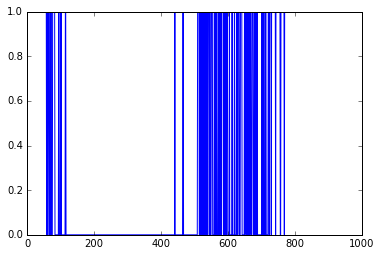

In [102]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
for pos in range(aln.get_alignment_length()):
    letters = Counter(aln[:, pos])
    num_gaps.append(bool(letters['-'] + letters['N']))
plt.plot(num_gaps)
# plt.ylim(-1, 3)

In [103]:
import pymc3 as pm
import numpy as np

In [104]:
num_gaps

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [166]:
with pm.Model() as model:
    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=0, upper=len(num_gaps))
    spaces_between = pm.DiscreteUniform('spaces_between', lower=0, upper=len(num_gaps))
    switchpoint2 = pm.DiscreteUniform('switchpoint2', lower=switchpoint1+spaces_between, upper=len(num_gaps))
    
    p1 = pm.Uniform('p1', lower=0, upper=1)
    p2 = pm.Uniform('p2', lower=0, upper=1)
    p3 = pm.Uniform('p3', lower=0, upper=1)
    
    rate1 = pm.math.switch(positions < switchpoint1, p1, p2)
    rate2 = pm.math.switch(positions > switchpoint2, p2, p3)
    
    mutations1 = pm.Bernoulli('mutations1', p=rate1, observed=num_gaps)
    mutations2 = pm.Bernoulli('mutations2', p=rate2, observed=num_gaps)

INFO (theano.gof.compilelock): Refreshing lock /Users/ericmjl/.theano/compiledir_Darwin-16.0.0-x86_64-i386-64bit-i386-3.5.2-64/lock_dir/lock


Applied interval-transform to p1 and added transformed p1_interval_ to model.
Applied interval-transform to p2 and added transformed p2_interval_ to model.
Applied interval-transform to p3 and added transformed p3_interval_ to model.


In [167]:
with model:
    step1 = pm.NUTS([p1, p2, p3])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint1, switchpoint2])

    trace = pm.sample(5000, step=[step1, step2])


Assigned Metropolis to spaces_between
 [-------100%-------] 5000 of 5000 in 7.3 sec. | SPS: 681.8 | ETA: 0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x189a91208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x189f78e48>]], dtype=object)

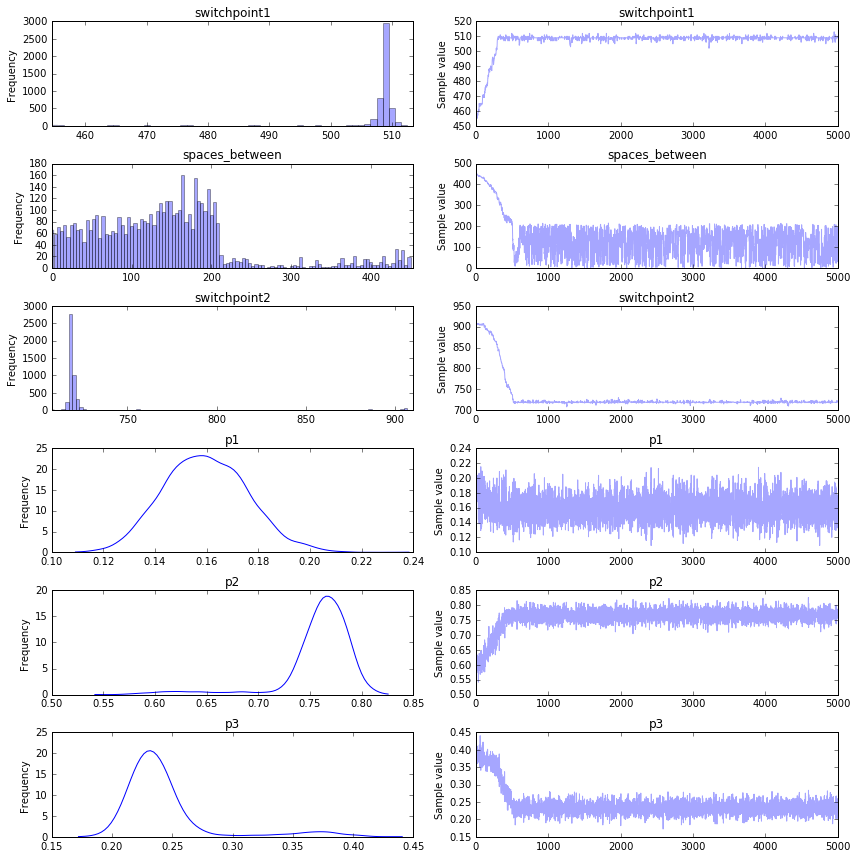

In [168]:
pm.traceplot(trace)

In [34]:
def last_element_index(li, el):
    """
    li: list
    el: element
    
    returns index of first occurrence of el in li.
    """
    idx = 0
    for i, l in enumerate(li):
        if l == el:
            idx = i
    return idx

In [35]:
last_element_index(num_gaps, 0.0)

722

In [36]:
start = num_gaps.index(0)
end = last_element_index(num_gaps, 0)
start, end

(12, 722)

In [134]:
aln = aln[:, 100:510]

distance(str(aln[0].seq), str(aln[3].seq))

18

In [135]:
distance(str(aln[1].seq), str(aln[3].seq))

7

In [136]:
distance(str(aln[2].seq), str(aln[3].seq))

0

In [137]:
str(aln[2].seq)

'AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGGGAAGCTGTCAAAATTCAATGGTCTCAGAATCCTGCAATGTTGTACAACAAAATGGAATTTGAACCATTTCAATCTTTAGTCCCCAAGGCCATTAGAAGCCAATACAGTGGGTTTGTCAGAACTCTATTCCAACAAATGAGAGACGTACTTGGGACATTTGACACTGCCCAGATAATAAAGCTTCTCCCTTTTGCAGCTGCTCCACCGAAGCAAAGCAGAATGCAGTTCTCTTCACTGACTGTGAATGTGAGGGGATCAGGGATGAGAATACTTGTAAGGGGCAATTCTCCTGTATTCAACTACAACAAAACCACTAAAAGGCTAACAATTCTCGGAAAAGATGCCGGCACTTTAATTGAAGACCCA'

In [138]:
str(aln[3].seq)

'AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGGGAAGCTGTCAAAATTCAATGGTCTCAGAATCCTGCAATGTTGTACAACAAAATGGAATTTGAACCATTTCAATCTTTAGTCCCCAAGGCCATTAGAAGCCAATACAGTGGGTTTGTCAGAACTCTATTCCAACAAATGAGAGACGTACTTGGGACATTTGACACTGCCCAGATAATAAAGCTTCTCCCTTTTGCAGCTGCTCCACCGAAGCAAAGCAGAATGCAGTTCTCTTCACTGACTGTGAATGTGAGGGGATCAGGGATGAGAATACTTGTAAGGGGCAATTCTCCTGTATTCAACTACAACAAAACCACTAAAAGGCTAACAATTCTCGGAAAAGATGCCGGCACTTTAATTGAAGACCCA'